<a href="https://colab.research.google.com/github/POOJACH76/Stress_Prediction/blob/main/Stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("/content/Stress-Lysis.csv")

In [3]:
!pip install DecisionTreeClassifier

In [4]:
df.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [5]:
X=df.drop("Stress_Level", axis=1)
y=df["Stress_Level"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=45)

In [8]:

from sklearn.ensemble import RandomForestClassifier

In [9]:
rf_model = RandomForestClassifier(random_state=45)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

In [10]:
from sklearn import metrics

In [11]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)

In [12]:
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 100.00%


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc_model = DecisionTreeClassifier(random_state=45)
dtc_model.fit(X_train, y_train)
dtc_y_pred = dtc_model.predict(X_test)

In [15]:
dtc_accuracy = metrics.accuracy_score(y_test, dtc_y_pred)
print(f"Decision Tree Acurracy: {dtc_accuracy * 100:.2f}%")

Decision Tree Acurracy: 100.00%


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def get_scores(model, actual, predicted):
    print(f"Model: {model}")


    accuracy = metrics.accuracy_score(actual, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    conf_matrix = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: Random Forest
Accuracy: 100.00%


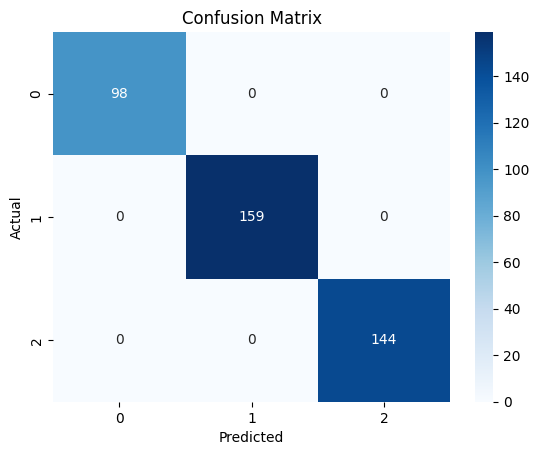

Model: Decision Tree
Accuracy: 100.00%


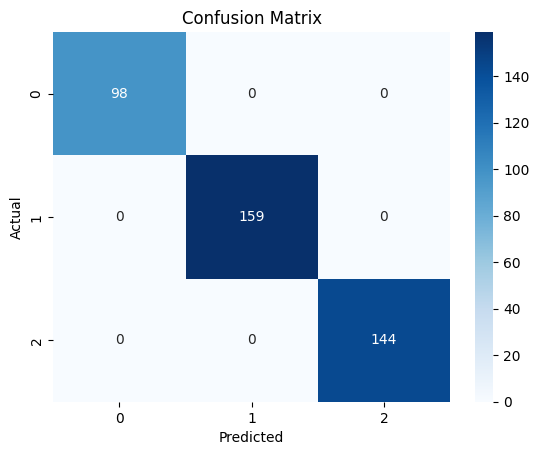

In [18]:
get_scores("Random Forest", y_test, rf_y_pred)
get_scores("Decision Tree", y_test, dtc_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_

Best Hyperparameters: {'max_depth': 5}
Model: Dcision Tree
Accuracy: 35.91%


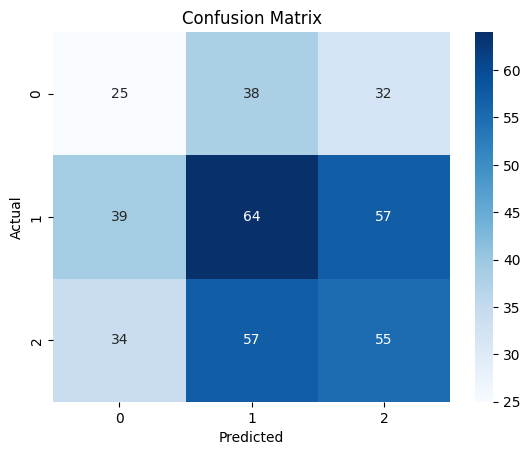

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 20]
}

# Separate features and target
X = df.drop("Stress_Level", axis=1)
y = df["Stress_Level"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=45)

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc_model, param_grid, cv=5, scoring='recall')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_dtc_model = grid_search.best_estimator_

# Use the best model for predictions
dtc_y_pred_tuned = best_dtc_model.predict(X_test)

# Print or use the best_params and dtc_y_pred_tuned as needed
print("Best Hyperparameters:", best_params)
get_scores("Dcision Tree", y_test, dtc_y_pred)


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))
print(classification_report(y_test, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.26      0.26      0.26        95
           1       0.40      0.40      0.40       160
           2       0.38      0.38      0.38       146

    accuracy                           0.36       401
   macro avg       0.35      0.35      0.35       401
weighted avg       0.36      0.36      0.36       401

              precision    recall  f1-score   support

           0       0.26      0.26      0.26        95
           1       0.40      0.40      0.40       160
           2       0.38      0.38      0.38       146

    accuracy                           0.36       401
   macro avg       0.35      0.35      0.35       401
weighted avg       0.36      0.36      0.36       401



In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.26      0.26      0.26        95
           1       0.40      0.40      0.40       160
           2       0.38      0.38      0.38       146

    accuracy                           0.36       401
   macro avg       0.35      0.35      0.35       401
weighted avg       0.36      0.36      0.36       401



In [22]:
import pickle

In [23]:

filename = "dtc_model.pkl"

In [24]:
loaded_model=pickle.dump(df,open(filename,'wb'))

In [25]:
import pickle

# Define the filename for the pickle file
filename = "dtc_model.pkl"

# Save the trained model to the pickle file
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)


In [27]:
unseen_data = pd.read_csv("/content/Human Stress (Responses) - Form Responses 1.csv")

In [28]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      10 non-null     int64  
 1   Temperature   10 non-null     float64
 2   Step_count    10 non-null     int64  
 3   Stress_Level  10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes


In [29]:
import pandas as pd

# Load the saved model from the pickle file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Load the unseen data
unseen_data = pd.read_csv("/content/Human Stress (Responses) - Form Responses 1.csv")

# Assuming 'unseen_data' contains the same features as the training data, drop the target variable
X_unseen = unseen_data.drop(['Stress_Level'], axis=1)

# Check if the model has been loaded successfully before making predictions
if loaded_model is not None:
    # Make predictions on the unseen data
    y_pred = loaded_model.predict(X_unseen)

    # Calculate the accuracy of the model on the unseen data
    y_true = unseen_data['Stress_Level']  # Assign the true labels
    unseen_accuracy = metrics.accuracy_score(y_true, y_pred)
    print(f"Decision Tree Accuracy on Unseen Data: {unseen_accuracy * 100:.2f}%")

    # Calculate the confusion matrix for the unseen data
    confusion_matrix_unseen = metrics.confusion_matrix(y_true, y_pred)

    print("Accuracy on Unseen Data:", unseen_accuracy)
    print("Confusion Matrix for Unseen Data:")
    print(confusion_matrix_unseen)
else:
    print("The model has not been loaded correctly.")

Decision Tree Accuracy on Unseen Data: 40.00%
Accuracy on Unseen Data: 0.4
Confusion Matrix for Unseen Data:
[[0 0 1]
 [0 0 4]
 [0 1 4]]


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.44      0.80      0.57         5

    accuracy                           0.40        10
   macro avg       0.15      0.27      0.19        10
weighted avg       0.22      0.40      0.29        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
def get_scores(model, actual, predicted):
    print(f"Model: {model}")


    accuracy = metrics.accuracy_score(actual, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    conf_matrix = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: Random Forest
Accuracy: 40.00%


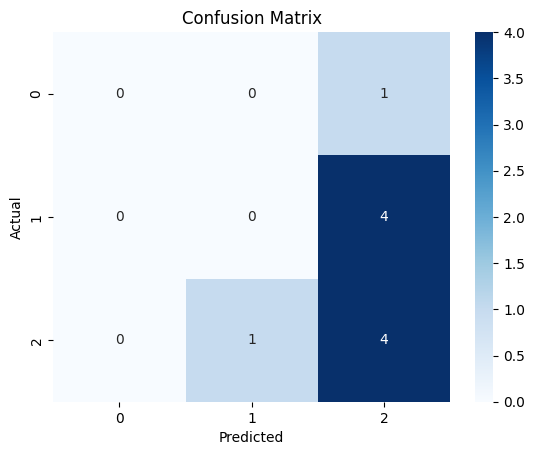

In [33]:
get_scores("Random Forest", y_true, y_pred)




In [34]:
from sklearn.metrics import recall_score, precision_score

def get_scores(rf_model, y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    print(f"Model: {rf_model}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")

In [35]:
import pandas as pd
import pickle

filename = "/content/dtc_model.pkl"

with open(filename, 'rb') as file:
    dtc_model = pickle.load(file)


custom_data = pd.DataFrame({
    'Humidity': [21.33],
    'Temperature': [90.33],
    'Step_count': [123],
    'Stress_Level': [1],
})

predictions = dtc_model.predict(custom_data)
probability_scores = dtc_model.predict_proba(custom_data)

# Assuming stress levels are 0, 1, and 2
risk_mapping = {0: 'low Stress', 1: 'normal', 2: 'High stress'}

# Convert predictions to corresponding labels
predictions = [risk_mapping[pred] for pred in predictions]

print("Predictions:")
print(predictions)

print("Probability Scores:")
print(probability_scores)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Stress_Level
